## Some plots of the output

Spectra, percentiles (real and predicted) and some components of the latents

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['xtick.labelsize'] = 'medium'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'medium'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['font.size'] = 30
mpl.rcParams["figure.figsize"] = (15,10)


In [2]:
wave=np.load('./saved_input/wave.npy')
x_test=np.load('../../seds_large/norm/seds.npy')
ind=np.load('./saved_models/ind_sh.npy')
x_test=x_test[ind,:][-15000:,:]
y_test=np.load('./saved_models/y.npy',allow_pickle=True)
ys_=np.load('./saved_models/y_test_pred.npy',allow_pickle=True)
latents=np.load('./saved_models/latents.npy',allow_pickle=True)
print(np.shape(y_test),np.shape(ys_),np.shape(latents))

(150000, 10) (1172,) (1172,)


Index 30
Index 3
Index 113
Index 39
Index 124
Index 87
Index 78
Index 66
Index 15
Index 46


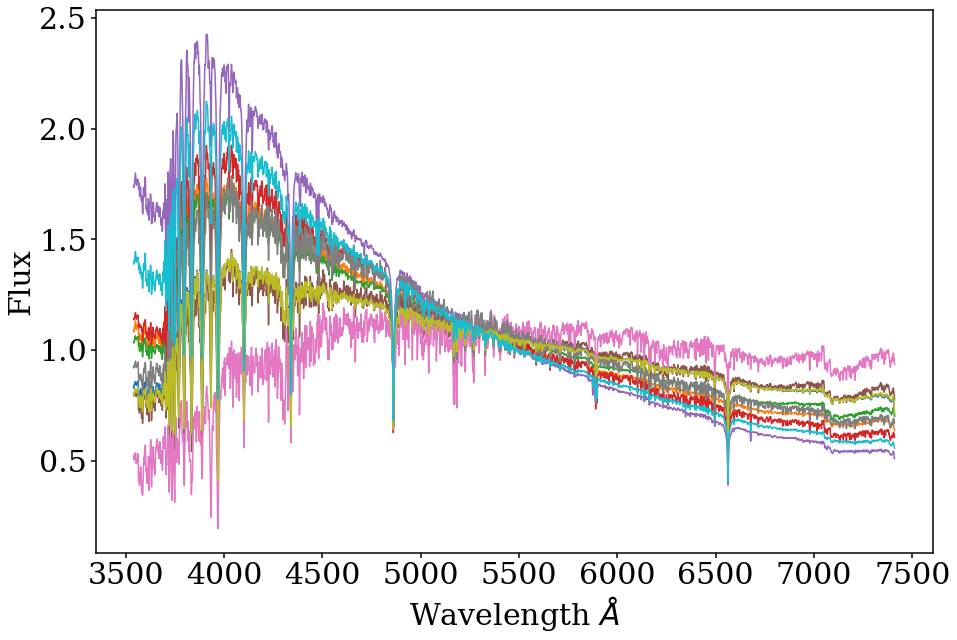

IndexError: index 30 is out of bounds for axis 0 with size 10

In [8]:
ind=np.random.choice(np.arange(128),size=10)
color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','gold']

#999 works pretty well
#spectrum
for i,index in enumerate(ind):
    print('Index '+str(index))
    plt.plot(wave,x_test[index,:],color=color[i])
plt.xlabel('Wavelength $\\AA$')
plt.ylabel('Flux')
plt.show()

#percentiles vs time
for i,index in enumerate(ind):
    plt.plot(y_test[index,:9],np.arange(10,100,10),'.-',label='real',color=color[i])
    plt.plot(ys_[index,:9],np.arange(10,100,10),'.--',label='predicted',color=color[i])
plt.ylabel('Percentiles %')
plt.xlabel('Time [Gyr]')
#plt.xlim(0,14)
#plt.xlim(2,4)
plt.ylim(0,100)
#plt.legend()
plt.show()

#metallicity
for i,index in enumerate(range(128)):
 plt.plot(y_test[index,-1],ys_[index,-1],'o',label='real',color='C'+str(i))
plt.xlabel('Z real')
plt.ylabel('Z predicted')
plt.show()


#latent space (1,2,3)
plt.figure()
ax = plt.axes(projection='3d')
for i,index in enumerate(ind):
    ax.scatter3D(latents[index,4],latents[index,5],latents[index,6],color=color[i])
ax.set_xlabel('Latent comp 1')
ax.set_ylabel('Latent comp 2')
ax.set_zlabel('Latent comp 3')
ax.view_init(20, 10)
plt.show()

#predicts bad the 'young population'


## Embedding the latents

We need to visualize better percentiles. We use the UMAP tool.

In [3]:
from tqdm import tqdm

batch_size=128
test_set=150000
n_latent=16

percent_pred_arr=np.zeros((test_set,10))
latents_arr=np.zeros((test_set,n_latent))
#percent_arr=np.zeros((test_set,10))


for j in tqdm(range(len(ys_))):
    for i,x in enumerate(ys_[j]):
        percent_pred_arr[batch_size*j+i,:]=x
        
for j in tqdm(range(len(latents))):
    for i,x in enumerate(latents[j]):
        latents_arr[batch_size*j+i,:]=x
        
"""for j in tqdm(range(len(y_test))):
    for i,x in enumerate(y_test[j]):
        percent_arr[batch_size*j+i,:]=x"""
        
percent_pred_arr=percent_pred_arr[ind,:][-15000:,:]
latents_arr=latents_arr[ind,:][-15000:,:]
percent_arr=np.copy(y_test)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1172/1172 [00:00<00:00, 7286.11it/s]


In [4]:
y_test=np.copy(percent_arr)



In [10]:
y_test=np.copy(percent_arr)



#!pip install umap-learn
import umap.umap_ as umap
reducer = umap.UMAP()
embed = reducer.fit_transform(latents_arr[:,:]) #train each time, if not, just transform


2023-05-16 00:40:07.738453: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/SIEvarios/cudnn-11.4-v8.2.4.15/lib64
2023-05-16 00:40:07.738500: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/opt/python/python3.8/lib/python3.8/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/pin-ext/.local/lib/python3.8/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


KeyboardInterrupt: 

In [5]:
#np.save('./saved_models/embed.npy',embed)


embed=np.load('./saved_models/embed.npy')

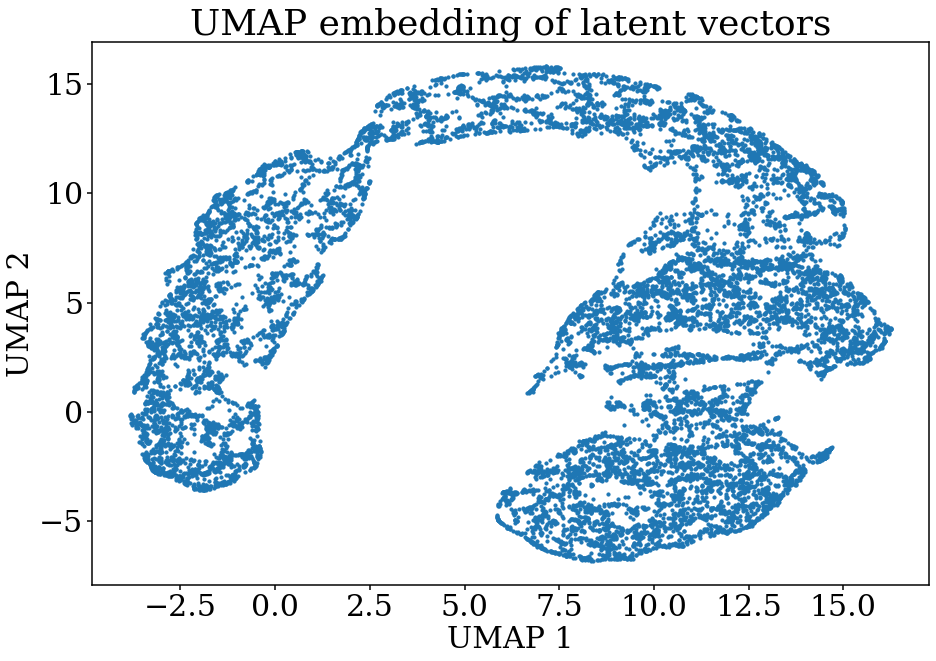

In [8]:


# no coloring
plt.scatter(embed[:,0], embed[:,1], s=10, c='tab:blue', rasterized=True)
plt.title('UMAP embedding of latent vectors')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
#plt.savefig('./plots_latent_diagnosis/UMAP.jpg')
plt.show()



In [ ]:
#which is the shape of the actual seds (no latents) - maybe too much dimensions to represent, but let's see

#embed_sed = reducer.fit_transform(x_test)


## Halpha

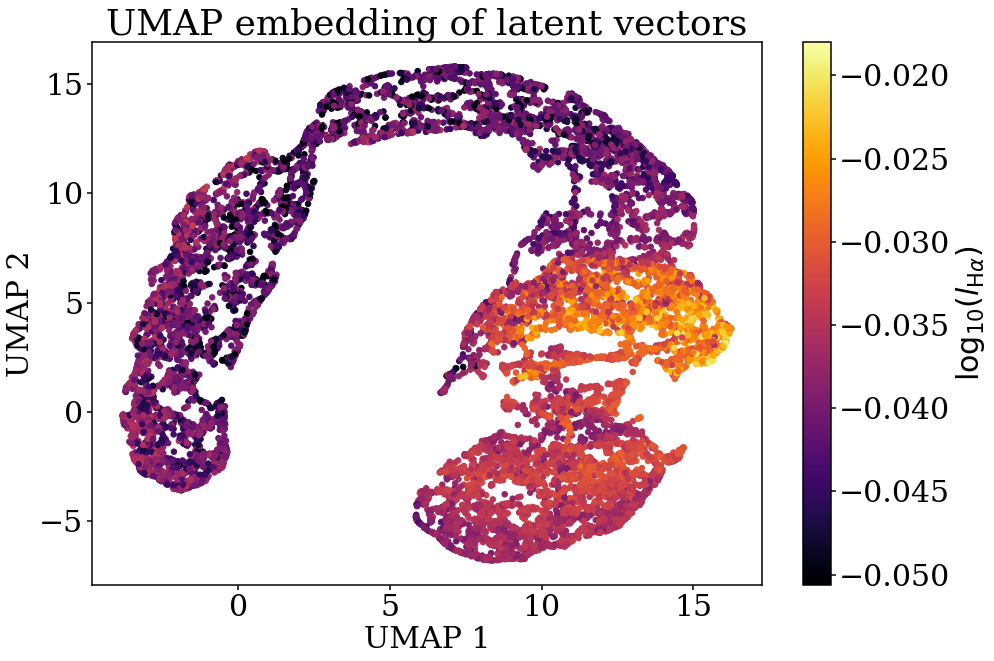

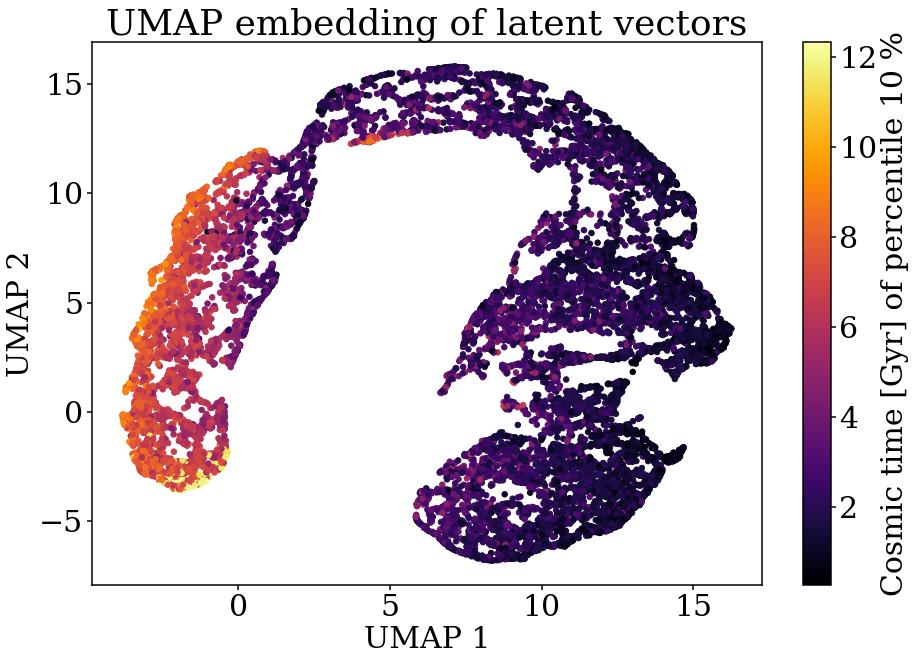

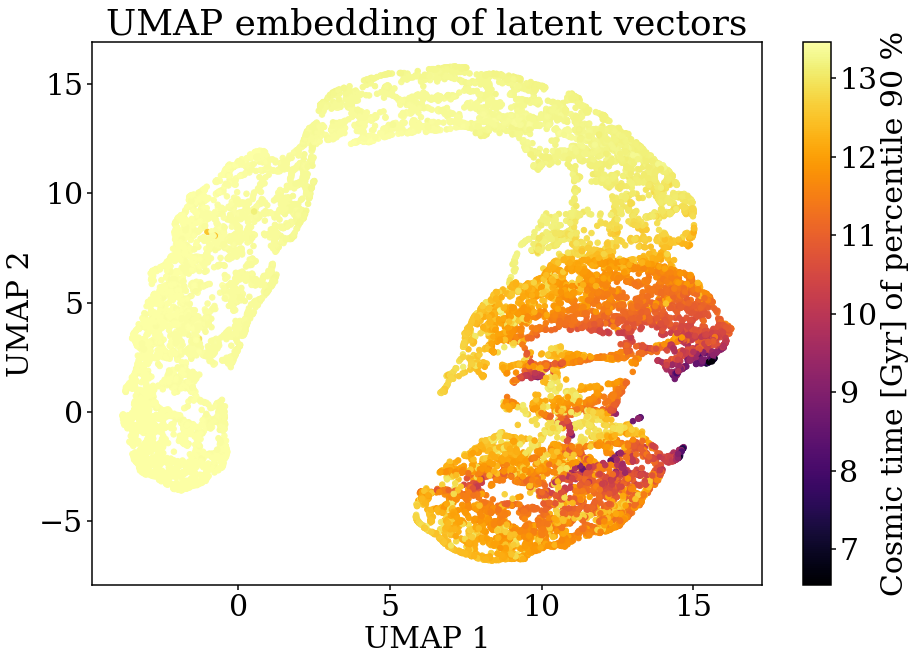

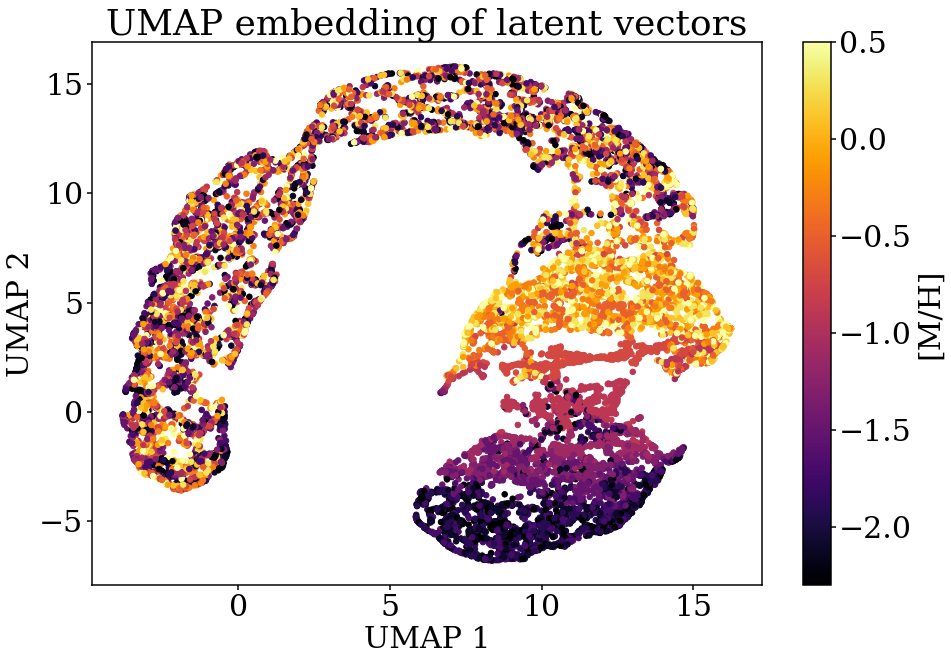

In [12]:
#lets try to see the dependance of the UMAP for latents with halpha
y_test=y_test[ind,:][-15000:,:]
# Halpha

def l(l_center=6563,delta=20):
    sel = (wave > l_center-delta) & (wave < l_center+delta)
    diff = x_test[:,sel]
    near=(wave > l_center-200) & (wave < l_center+200)
    return np.mean(diff,axis=1) / np.median(x_test[:,near],axis=1)

color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','gold']


#the maximum is to avoid divergences
plt.scatter(embed[:,0], embed[:,1], s=30, c=np.log10(np.maximum(1e-2,l(l_center=6563))), rasterized=True, cmap='inferno')
plt.colorbar(label=r'$\log_{10}(l_{\mathrm{H}\alpha})$')
plt.title('UMAP embedding of latent vectors')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
#plt.savefig('./plots_latent_diagnosis/UMAP_halpha.jpg')

#color samples 
#for i,ind in enumerate(np.arange(0,15000,1500)):
#    plt.scatter(embed[ind,0], embed[ind,1], s=150, c=color[i], rasterized=True, cmap='inferno')
#plt.savefig('umap_halpha.jpeg')
plt.show()


sel = (wave > 6543) & (wave < 6583)
diff = x_test[:,sel]

"""
spectra of color samples
for i,ind in enumerate(np.arange(0,15000,1500)):
    plt.plot(wave[sel],diff[ind,:],color=color[i])
plt.axvline(6563,0,1,ls='--',c='k')
plt.title('Zoom in Halpha')
#plt.savefig('halpha.jpeg')
plt.show()"""

#lets try to see the dependance with time percentile 10% (a bit random)
plt.scatter(embed[:,0], embed[:,1], s=30, c=y_test[:,0], rasterized=True, cmap='inferno')
plt.colorbar(label='Cosmic time [Gyr] of percentile 10 %')
plt.title('UMAP embedding of latent vectors')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
#plt.savefig('./plots_latent_diagnosis/UMAP_10.jpg')
plt.show()

#lets try to see the dependance with time percentile 90% (as expected from the seds)
#galaxies from the right formed all their stars soon

plt.scatter(embed[:,0], embed[:,1], s=30, c=y_test[:,-2], rasterized=True, cmap='inferno')
plt.colorbar(label='Cosmic time [Gyr] of percentile 90 %')
plt.title('UMAP embedding of latent vectors')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
#plt.savefig('./plots_latent_diagnosis/UMAP_90.jpg')
plt.show()



#lets try to see the dependance with metallicity (as expected from the seds)

plt.scatter(embed[:,0], embed[:,1], s=30, c=y_test[:,-1], rasterized=True, cmap='inferno')
plt.colorbar(label='[M/H]')
plt.title('UMAP embedding of latent vectors')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
#plt.savefig('./plots_latent_diagnosis/UMAP_met.jpg')
plt.show()


## Hbeta

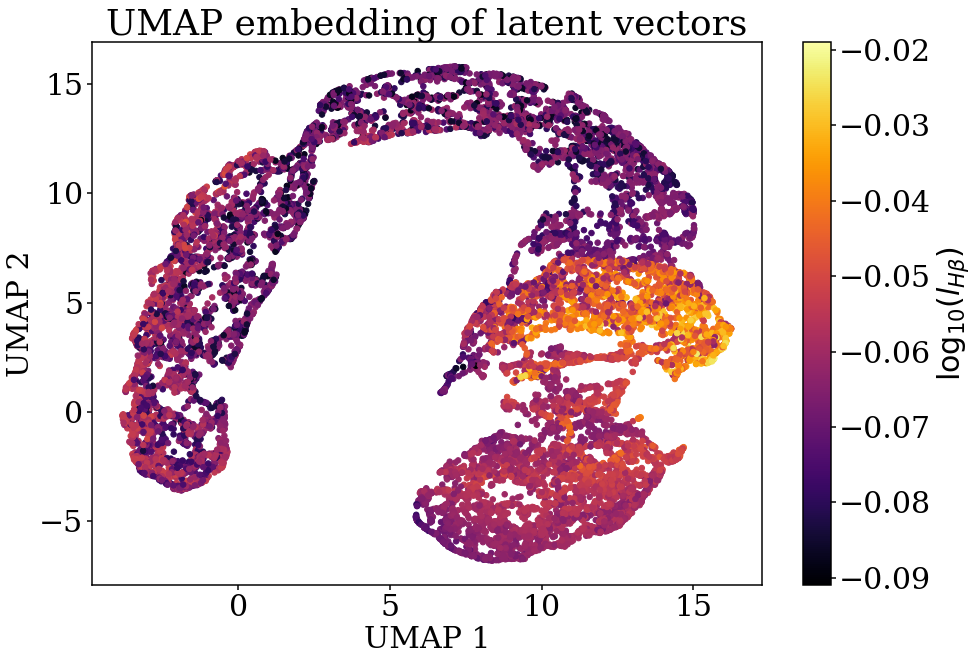

"\nsel = (wave > 4800 ) & (wave < 5000)\ndiff = x_test[:,sel]\n\nfor i,ind in enumerate(np.arange(0,15000,1500)):\n    plt.plot(wave[sel],diff[ind,:],color=color[i])\nplt.axvline(4863,0,1,ls='--',c='k')\nplt.title('Zoom in Hbeta')\n#plt.savefig('hbeta.jpeg')\nplt.show()"

In [13]:
#lets try to see the dependance of the UMAP for latents with Hbeta

color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','gold']

#the maximum is to avoid divergences
plt.scatter(embed[:,0], embed[:,1], s=30, c=np.log10(np.maximum(1e-2,l(l_center=4863))), rasterized=True, cmap='inferno')
plt.colorbar(label=r'$\log_{10}(l_{H \beta})$')
plt.title('UMAP embedding of latent vectors')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
#plt.savefig('./plots_latent_diagnosis/UMAP_hbeta.jpg')
#for i,ind in enumerate(np.arange(0,15000,1500)):
#    plt.scatter(embed[ind,0], embed[ind,1], s=150, c=color[i], rasterized=True, cmap='inferno')

plt.show()

"""
sel = (wave > 4800 ) & (wave < 5000)
diff = x_test[:,sel]

for i,ind in enumerate(np.arange(0,15000,1500)):
    plt.plot(wave[sel],diff[ind,:],color=color[i])
plt.axvline(4863,0,1,ls='--',c='k')
plt.title('Zoom in Hbeta')
#plt.savefig('hbeta.jpeg')
plt.show()"""

## OII

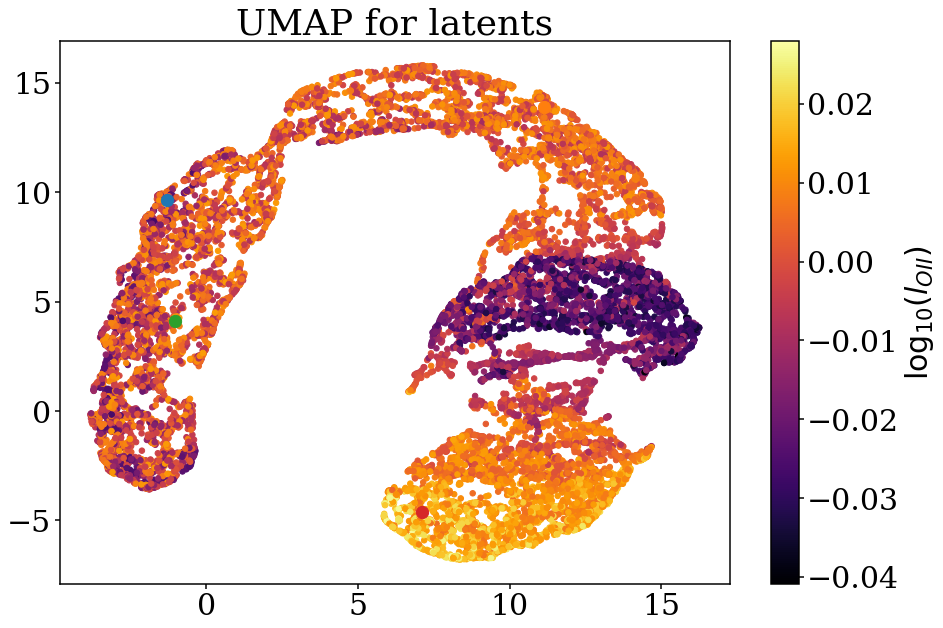

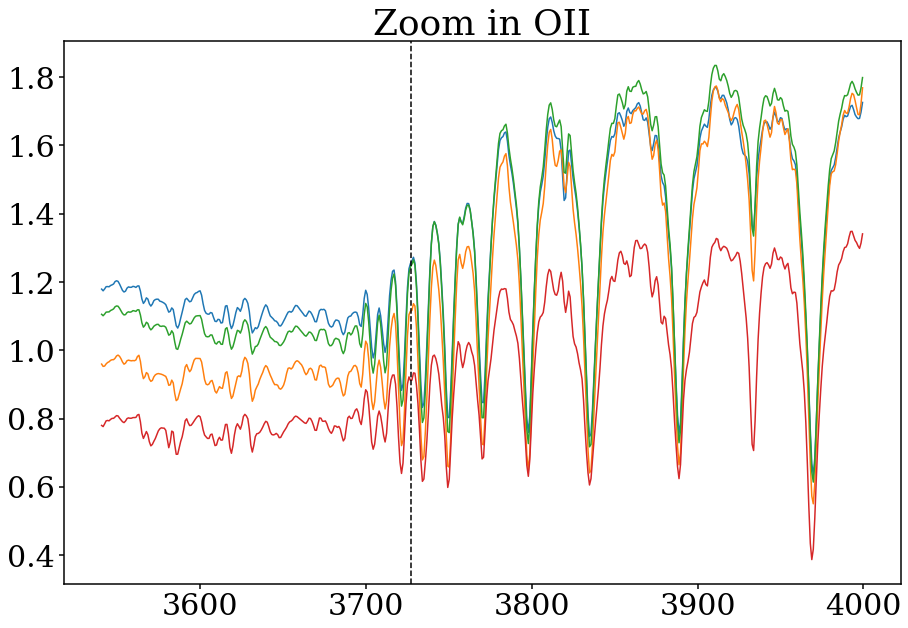

In [20]:
#lets try to see the dependance of the UMAP for latents with OII

color=['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','gold']

#the maximum is to avoid divergences
plt.scatter(embed[:,0], embed[:,1], s=30, c=np.log10(np.maximum(1e-2,l(l_center=3727))), rasterized=True, cmap='inferno')
plt.colorbar(label=r'$\log_{10}(l_{OII})$')
plt.title('UMAP for latents')
for i,ind in enumerate(np.arange(0,15000,4500)):
    plt.scatter(embed[ind,0], embed[ind,1], s=150, c=color[i], rasterized=True, cmap='inferno')
plt.savefig('umap_oii.jpeg')
plt.show()


sel = (wave > 3000 ) & (wave < 4000)
diff = x_test[:,sel]

for i,ind in enumerate(np.arange(0,15000,4500)):
    plt.plot(wave[sel],diff[ind,:],color=color[i])
plt.axvline(3727,0,1,ls='--',c='k')
plt.title('Zoom in OII')
#plt.savefig('oii.jpeg')
plt.show()

## Correlation between latents and spectrum regions

           1         2         3         4         5         6         7  \
1   1.000000 -0.846492 -0.747401  0.214115 -0.477423  0.886363  0.589453   
2  -0.846492  1.000000  0.363488 -0.488800  0.020014 -0.550804 -0.724344   
3  -0.747401  0.363488  1.000000  0.393673  0.889876 -0.945986 -0.132362   
4   0.214115 -0.488800  0.393673  1.000000  0.638443 -0.230963  0.243778   
5  -0.477423  0.020014  0.889876  0.638443  1.000000 -0.806449 -0.053261   
6   0.886363 -0.550804 -0.945986 -0.230963 -0.806449  1.000000  0.374398   
7   0.589453 -0.724344 -0.132362  0.243778 -0.053261  0.374398  1.000000   
8  -0.223822 -0.205261  0.767023  0.829296  0.953600 -0.632503  0.100414   
9  -0.463835  0.243885  0.384804 -0.386015  0.267977 -0.414807  0.197175   
10  0.814343 -0.585231 -0.822471 -0.331934 -0.731402  0.913886  0.622410   
11  0.554804 -0.688300  0.062002  0.643514  0.301637  0.231783  0.647159   
12  0.786328 -0.812723 -0.267773  0.692376  0.094399  0.468822  0.478763   
13  0.750673

Text(94.5, 0.5, 'Component latent vectors')

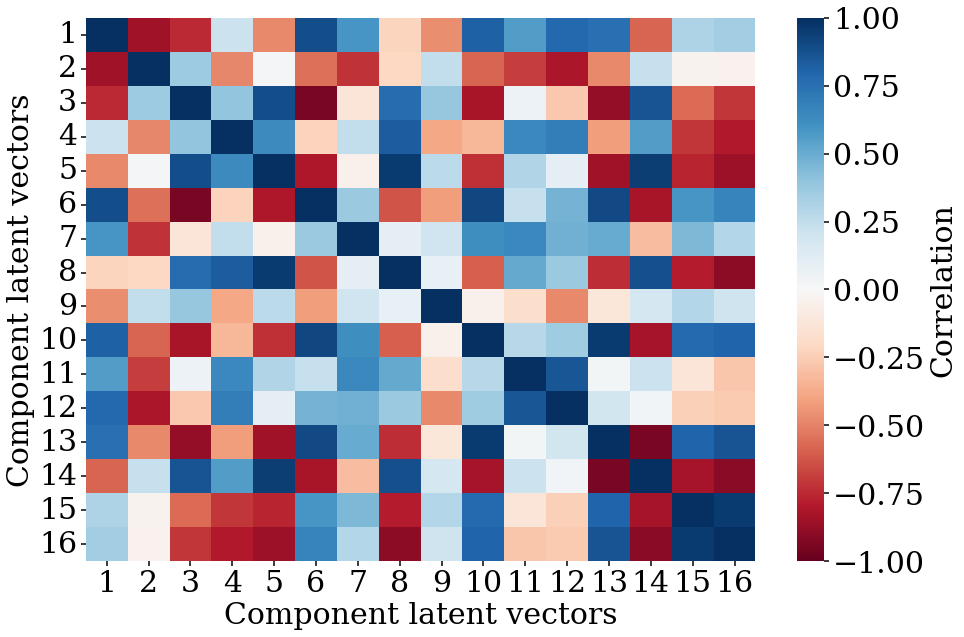

In [8]:
#first correlations inside the latents

import pandas as pd
import seaborn as sns



latent_data=pd.DataFrame(latents_arr, columns = [str(i) for i in range(1,17)])
corr = latent_data.corr()
print(corr)
sns.heatmap(corr, cmap='RdBu',vmin=-1, vmax=1,cbar_kws={'label': 'Correlation'})#,annot=True)
plt.xlabel('Component latent vectors')
plt.ylabel('Component latent vectors')
#plt.savefig('correlation.jpg')

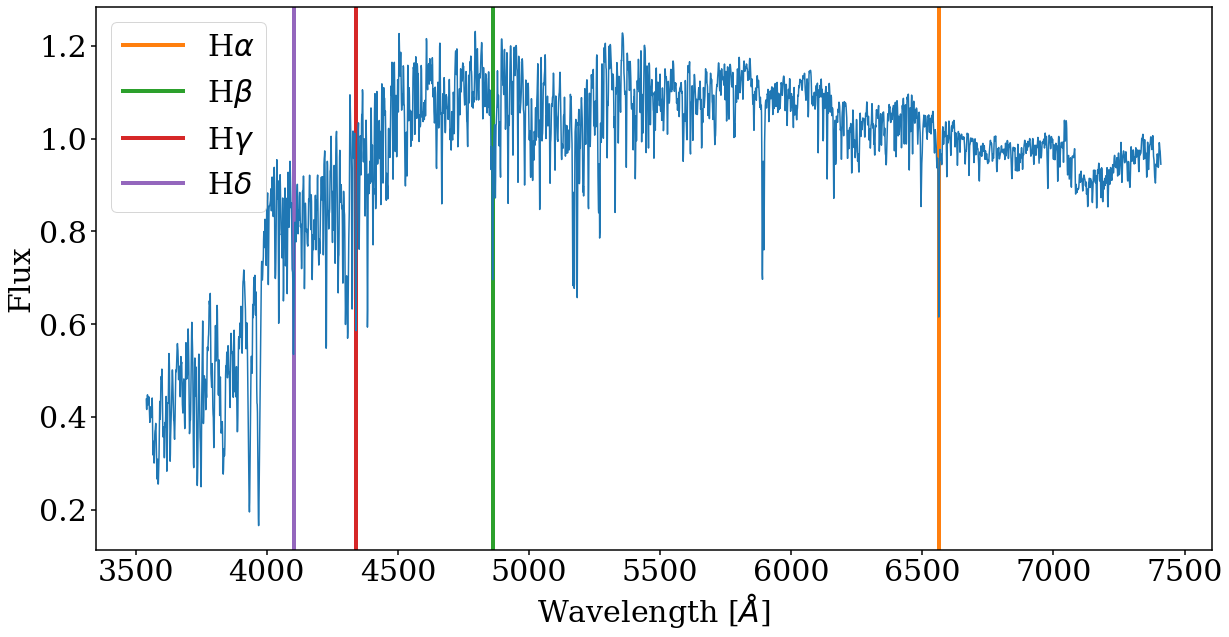

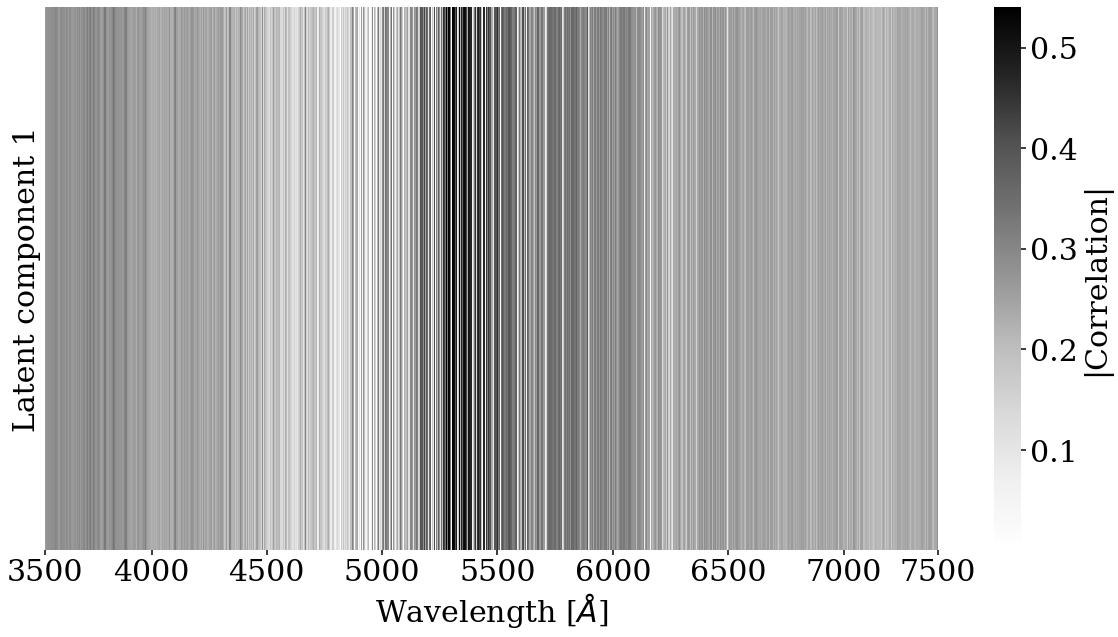

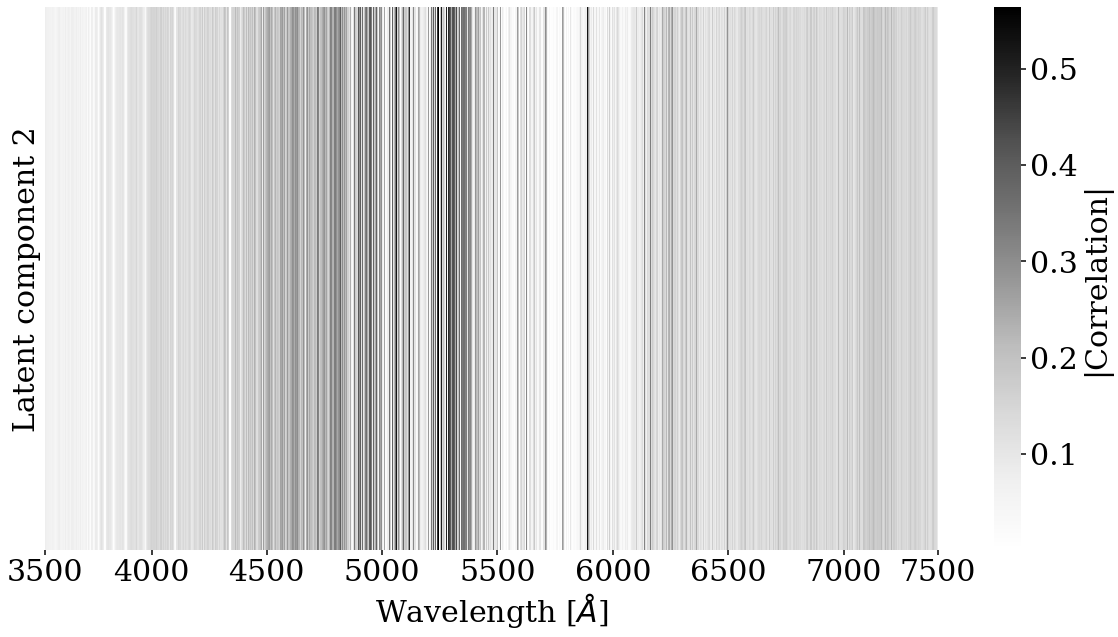

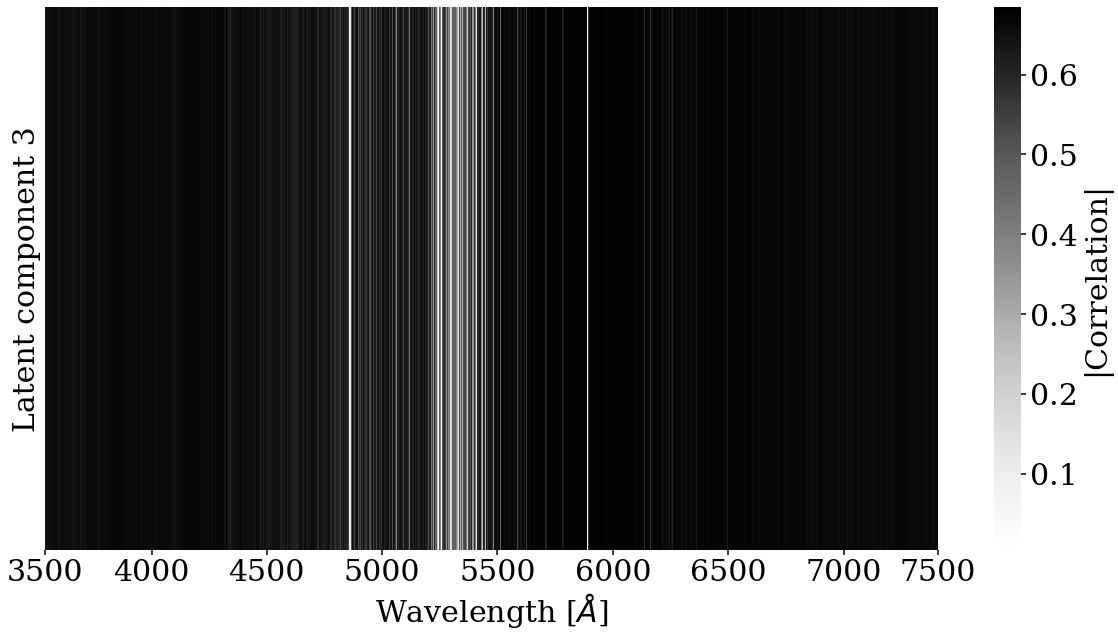

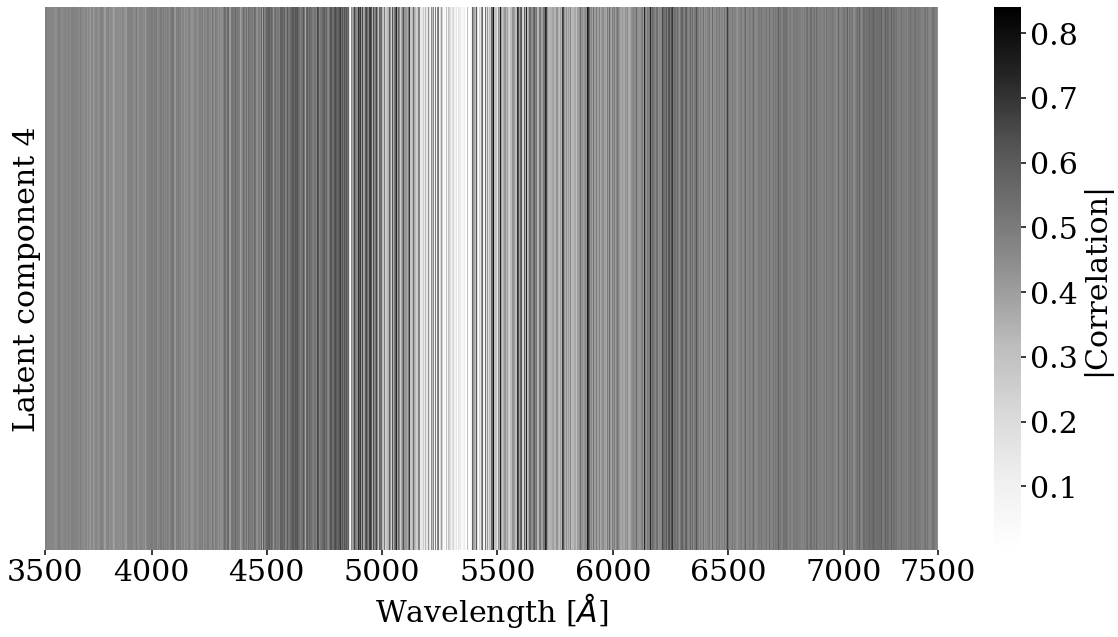

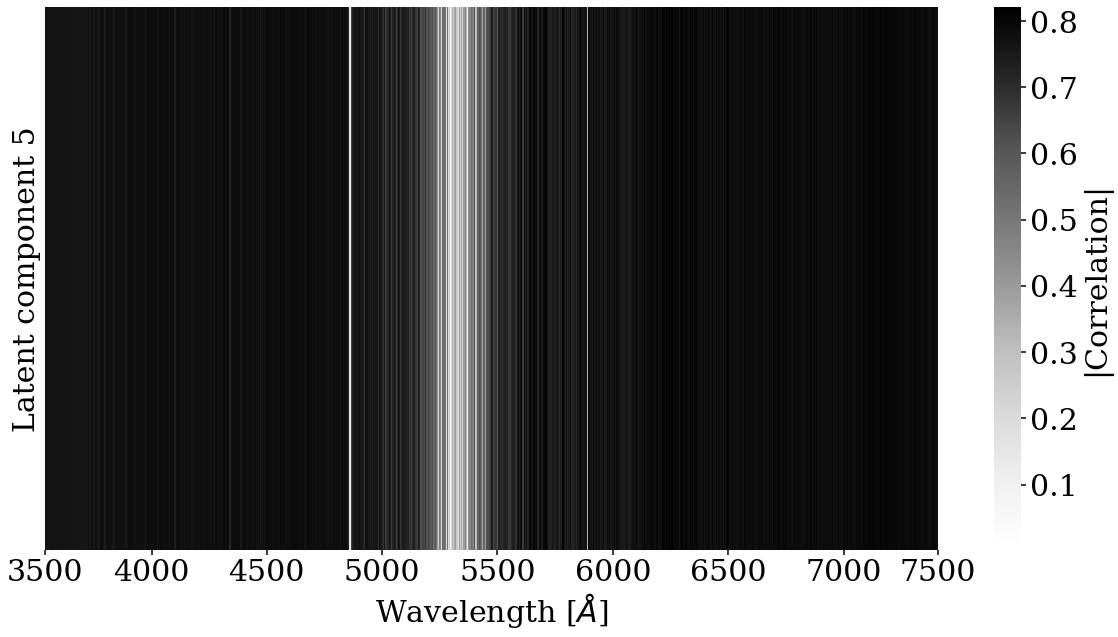

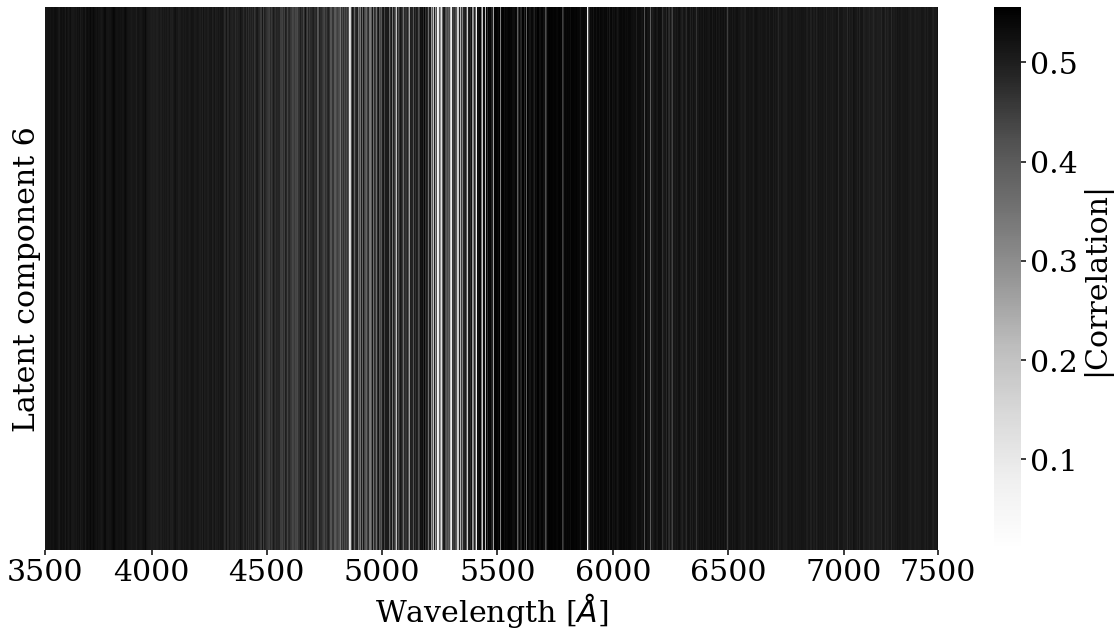

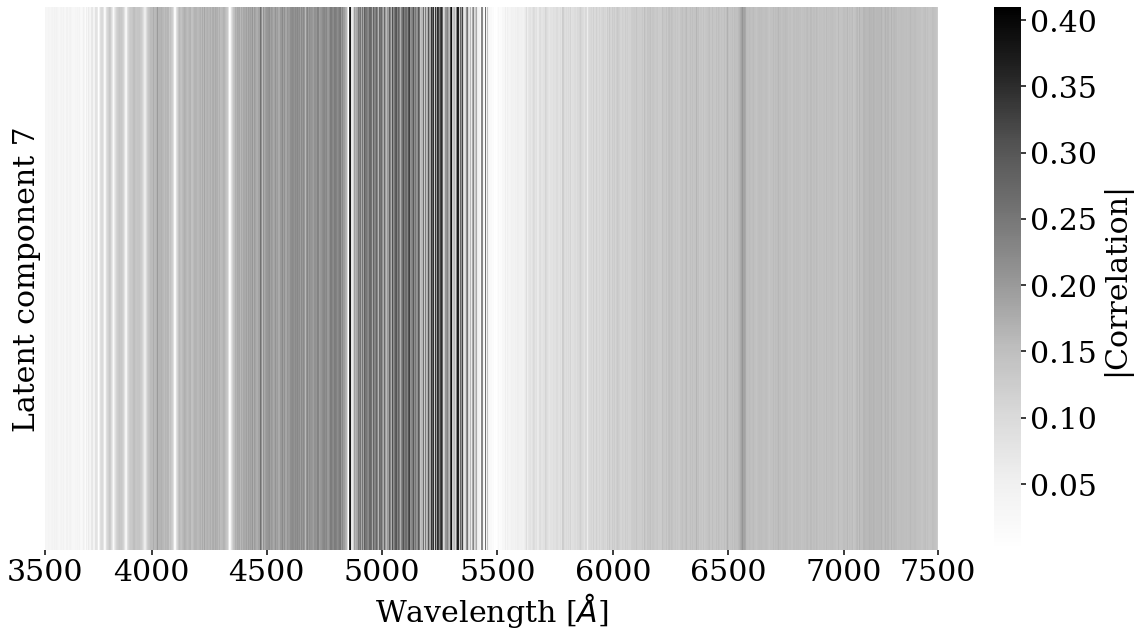

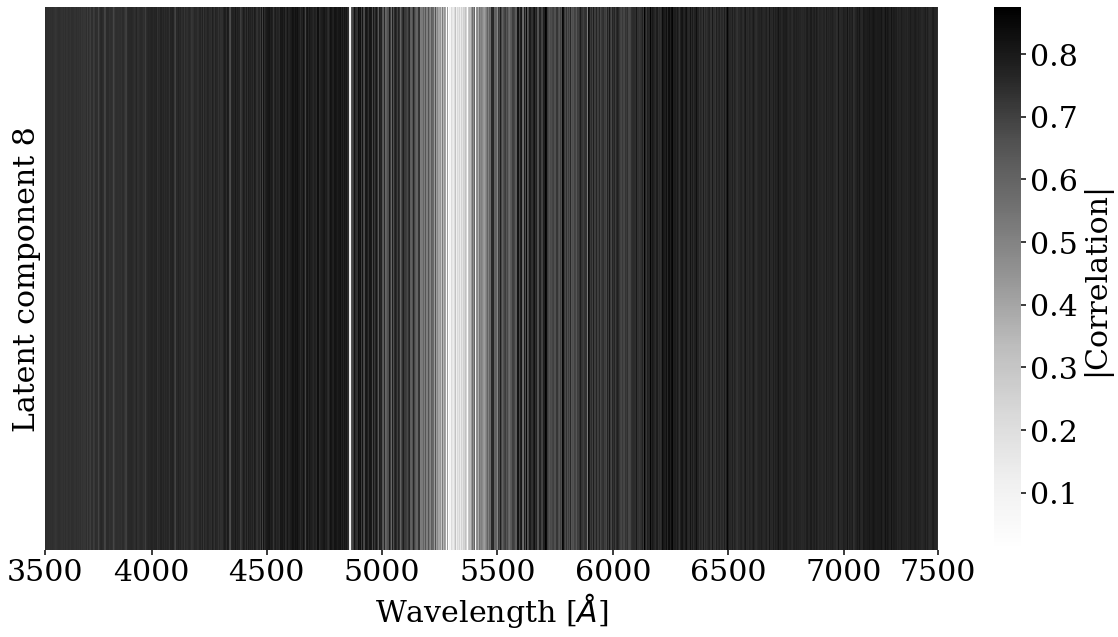

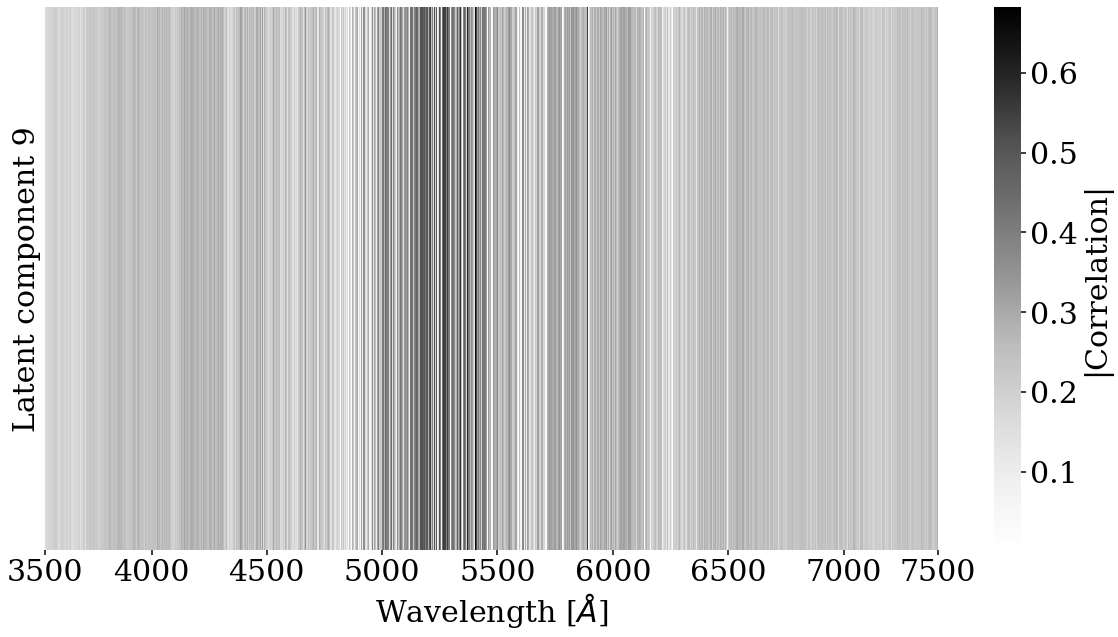

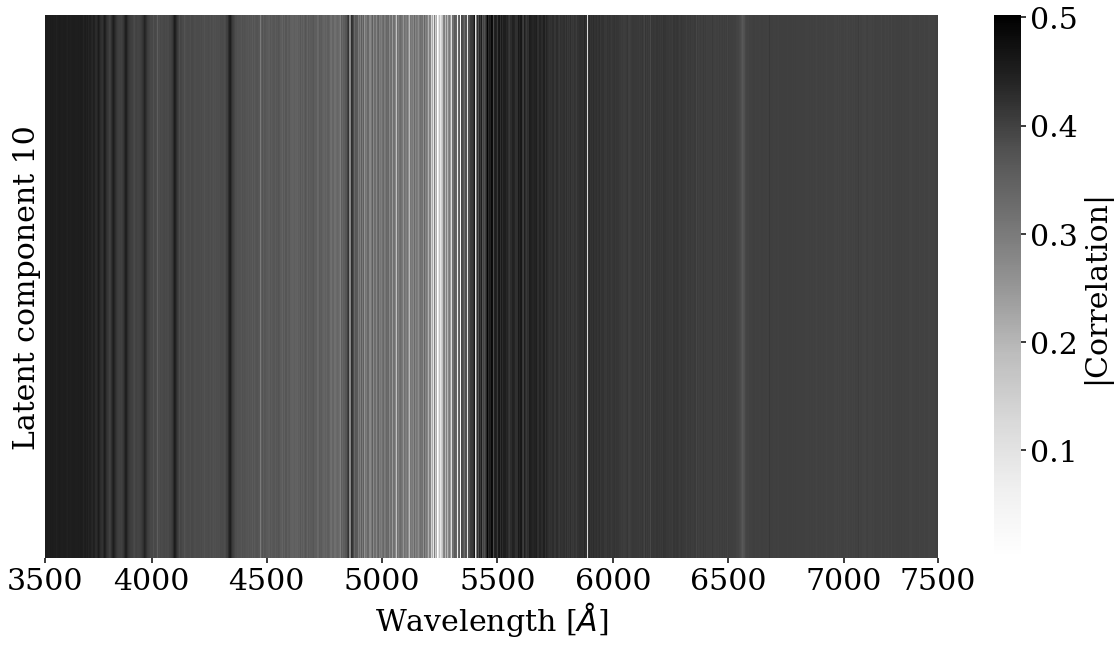

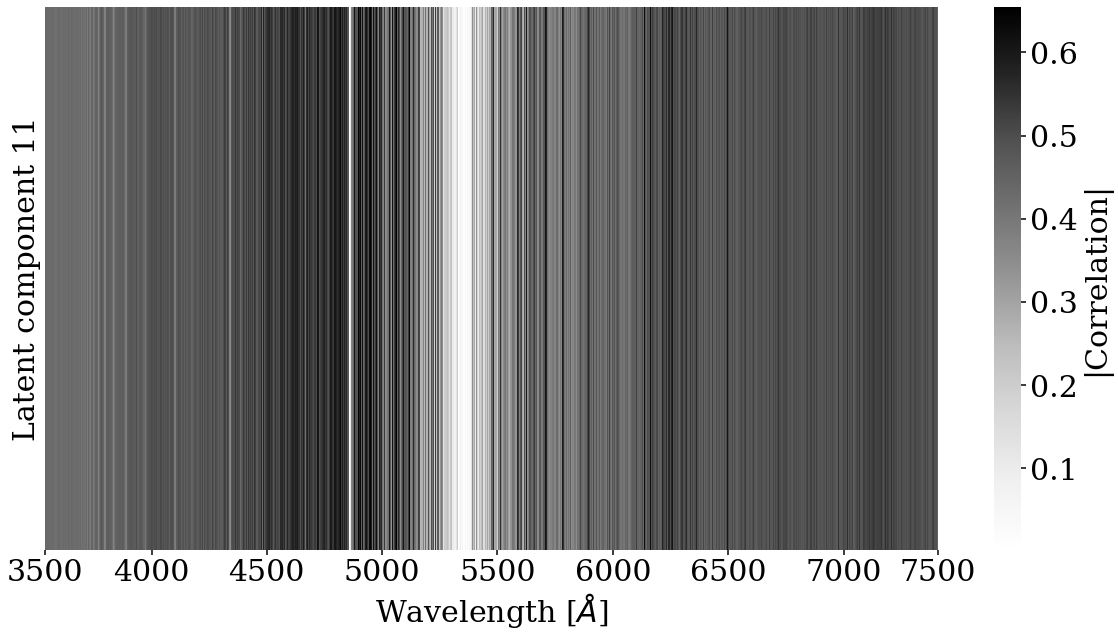

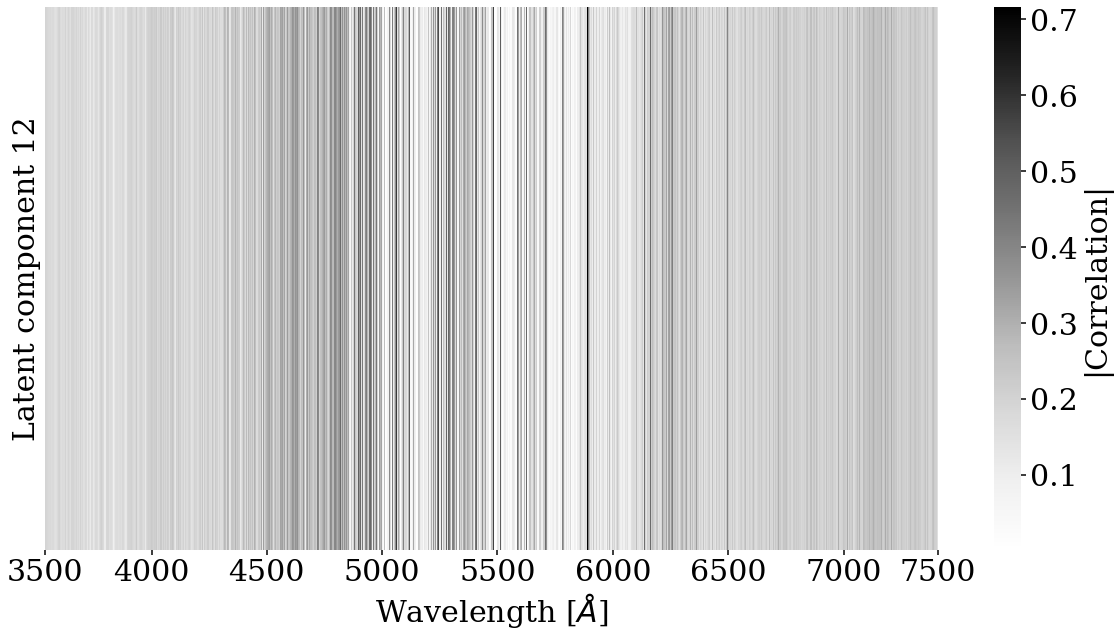

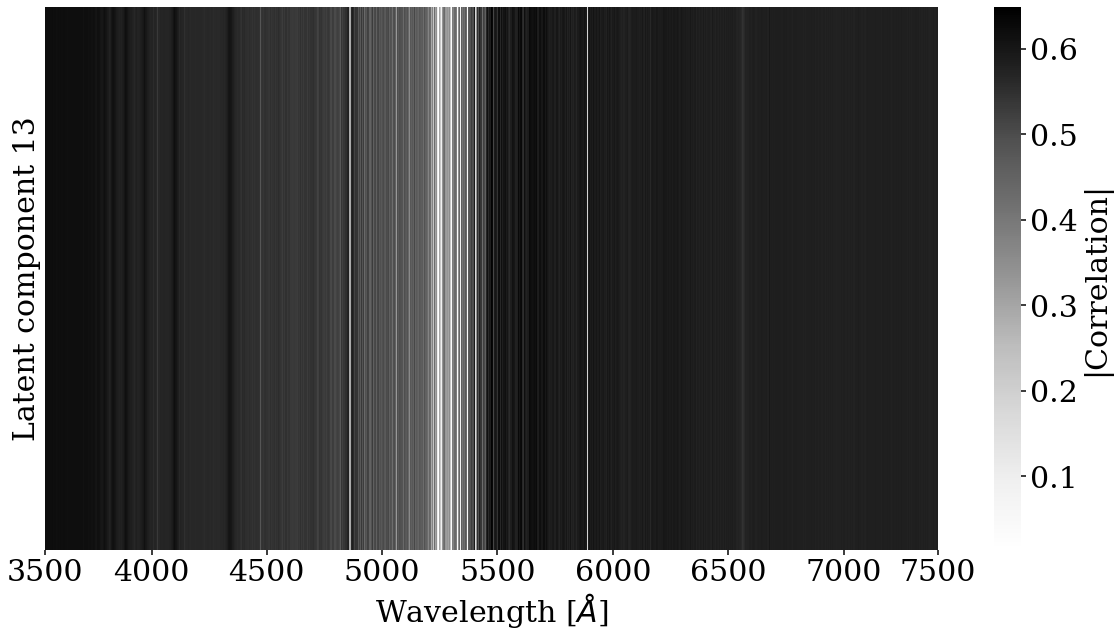

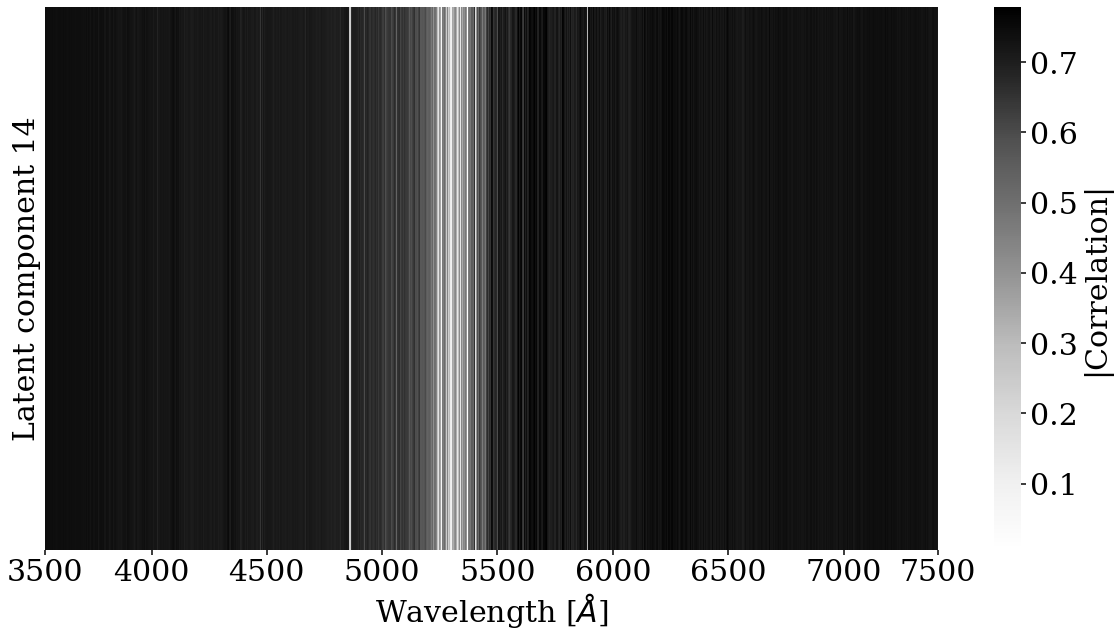

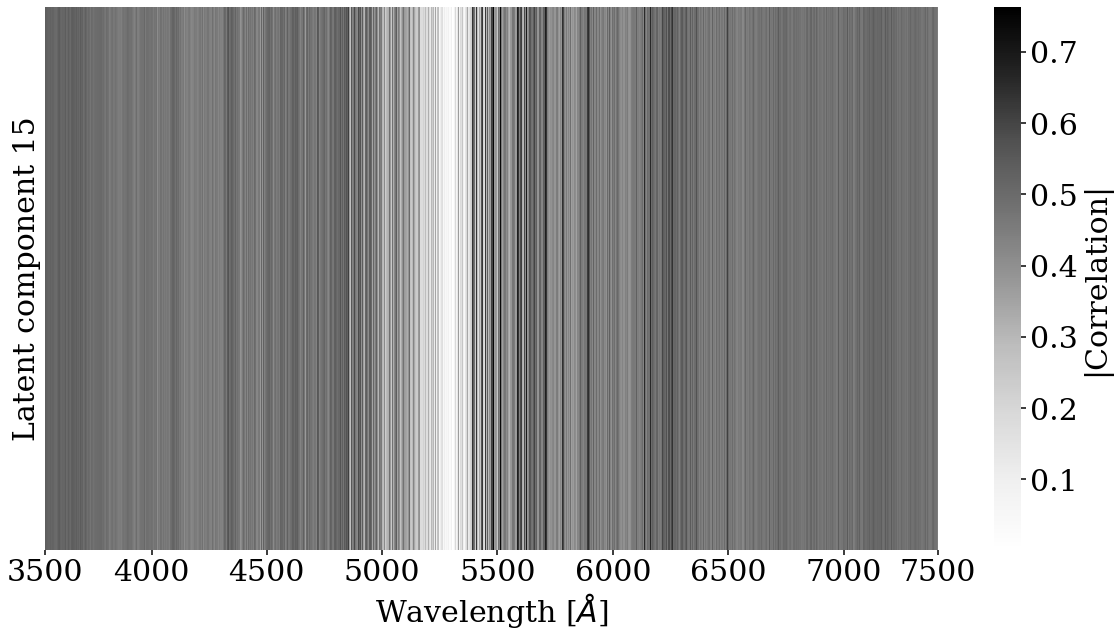

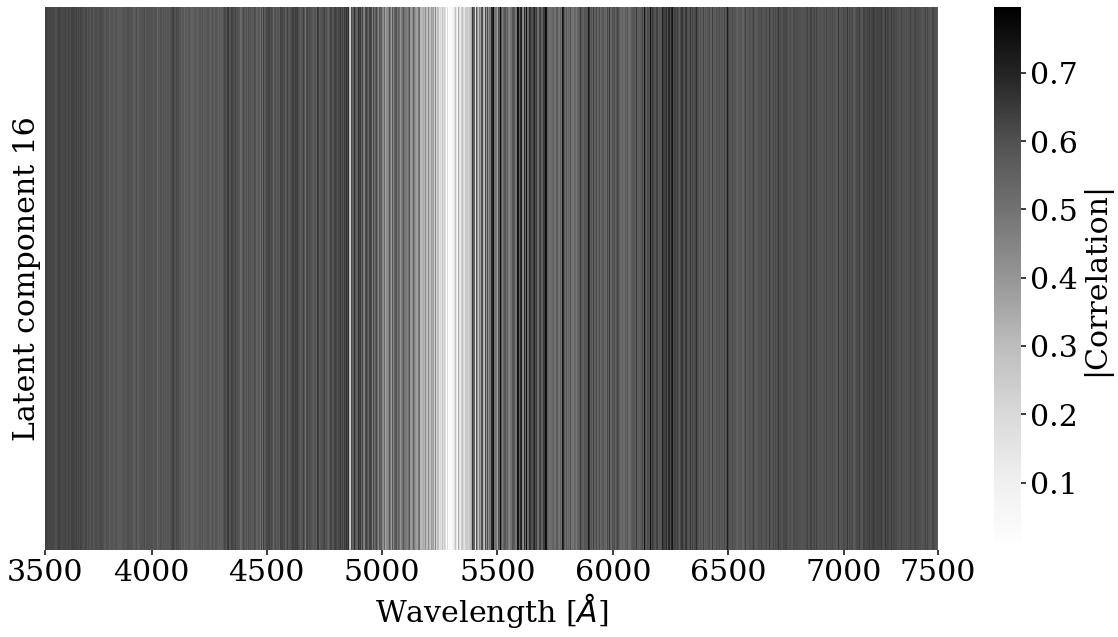

In [14]:

#the same but component by component to see better the colorbar



# correlation between latents and spectrum

import matplotlib

x_test_short=np.zeros((15000,43))


for i in range(43):
    x_test_short[:,i]=np.mean(x_test[:,i*100:(i+1)*100],axis=1)

color=['tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','gold']


plt.figure(figsize=(20,10))
#plt.xticks(np.arange(4300)[::200],labels=wave[::200],rotation=45)
plt.axvline( 6564.61,label='H$\\alpha$',lw=4,c=color[0])
plt.axvline(  4862.68,label='H$\\beta$',lw=4,c=color[1])
plt.axvline(4341.68,label='H$\\gamma$',lw=4,c=color[2])
plt.axvline(4102.89,label='H$\\delta$',lw=4,c=color[3])
#plt.axvline(3727.092,label='OII',lw=4,c=color[4])
#plt.axvline(3729.875,lw=4,c=color[5]) #label='OII'
#plt.axvline(5895.6,label='Na',lw=4,c=color[6])



plt.plot(wave,x_test[100,:])#,label='Real resolution') #real spectra
#plt.plot(wave[::100],x_test_short[100,:],label='Low resolution') #low resolution spectra
plt.xlabel('Wavelength [$\\AA$]')
plt.ylabel('Flux')
#plt.grid()

plt.legend(fontsize=30)
#plt.savefig('./plots_latent_diagnosis/spectra_example.jpg')
plt.show()





corr_map=np.corrcoef(latents_arr,x_test[:,:],rowvar=False)
corr_map_imp=corr_map[:16,16:]

xlabels=np.arange(3500,8000,500)
xticks=[]

for i in xlabels:
    xticks.append(np.argmin(np.abs(wave-i)))


for i in range(16):
    component_map=corr_map_imp[i,:]
    component_map=np.reshape(component_map,(1,4300))
    #doesnt matter the sign of the correlation
    plt.figure(figsize=(20,10))
    ax=sns.heatmap(np.abs(component_map), cmap='Greys',vmin=np.min(np.abs(component_map)), vmax=np.max(np.abs(component_map)),\
                yticklabels=[], cbar_kws={'label': '|Correlation|'})
    ax.set_xticks(ticks=xticks)
    ax.set_xticklabels(xlabels,rotation = 0)
    ax.set_xlabel('Wavelength [$\\AA$]')
    plt.ylabel('Latent component '+str(i+1))
    #if i==15:
    #    plt.savefig('corr_spectra_allpos_16.jpg')
    plt.savefig('./plots_latent_diagnosis/corr_spectra_'+str(i)+'.jpg')
    plt.show()



## Line indexes

Different metal indicators (CN2, Fe4383, and Mgb) and different age-sensitive indexes (Hβ, D4000, and HγF).

In [6]:
# -----
# Load modules
# -----

from astropy.io import ascii


def flux_sum(wave, flux, bend, rend):
    
    # ---> Wavelength step
    step = wave[1] - wave[0]
    
    # ---> Add up the flux within the band
    # execpt for the first and last pixels
    total = sum(flux[(wave >= bend + step/2) & (wave <= rend - step/2)])
    
    # ---> Divide the flux of the first and
    # last pixels within the band definition
    
    # Blue end
    nfrac = wave[(wave > bend - step/2) & (wave < bend + step/2)]
    if nfrac.size != 0:
        wfrac = ((nfrac + step/2) - bend) / step
        total = total + flux[(wave > bend - step/2) & (wave < bend + step/2)] * wfrac

    # Red end
    nfrac = wave[(wave < rend + step/2) & (wave > rend - step/2)]
    if nfrac.size != 0:
        wfrac = (rend-(nfrac - step/2)) / step
        total = total + flux[(wave > rend - step/2) & (wave < rend + step/2)] * wfrac
      
    # Return the total flux within the band
    return total

def line_index(wave, flux, index, dat):
    
    # ---> Blue continuumm
    blue_c = flux_sum(wave, flux, dat[dat['NAME'] == index]['Blue_1'][0], 
                      dat[dat['NAME'] == index]['Blue_2'][0])

    blue_width = (dat[dat['NAME'] == index]['Blue_1'][0] + 
                  dat[dat['NAME'] == index]['Blue_2'][0]) / 2.
    
    blue_c = blue_c / (dat[dat['NAME'] == index]['Blue_2'][0] - 
                       dat[dat['NAME'] == index]['Blue_1'][0])
    
    # ---> Red continuumm
    red_c  = flux_sum(wave, flux, dat[dat['NAME'] == index]['Red_1'][0], 
                      dat[dat['NAME'] == index]['Red_2'][0])
    
    red_width = (dat[dat['NAME'] == index]['Red_1'][0] + 
                 dat[dat['NAME'] == index]['Red_2'][0]) / 2.
    
    red_c = red_c / (dat[dat['NAME'] == index]['Red_2'][0] - 
                       dat[dat['NAME'] == index]['Red_1'][0])
    
    # ---> Continuumm normalization
    mval   = (red_c - blue_c) / (red_width - blue_width)
    cval_1 = (mval*(dat[dat['NAME'] == index]['Line_1'][0] - blue_width)) + blue_c
    cval_2 = (mval*(dat[dat['NAME'] == index]['Line_2'][0] - blue_width)) + blue_c
    cont   = 0.5 * (cval_1 + cval_2)*(dat[dat['NAME'] == index]['Line_2'][0] -
                                      dat[dat['NAME'] == index]['Line_1'][0])
    
    # ---> Central band-pass
    band_c  = flux_sum(wave, flux, dat[dat['NAME'] == index]['Line_1'][0], 
                    dat[dat['NAME'] == index]['Line_2'][0])


    # ---> Calculate the index
    if dat[dat['NAME'] == index]['T'] == 2:
        
        # ---> This is a atomic line 
        index_val = (1. - (band_c/cont)) * (dat[dat['NAME'] == index]['Line_2'][0] - 
                                            dat[dat['NAME'] == index]['Line_1'][0])

    if dat[dat['NAME'] == index]['T'] == 1:
        
        # ---> This is a molecular line
        index_val = -2.5 * np.log10(band_c/cont)
        
        
    return index_val


  0%|                                                                                                                                                     | 0/5 [00:00<?, ?it/s]

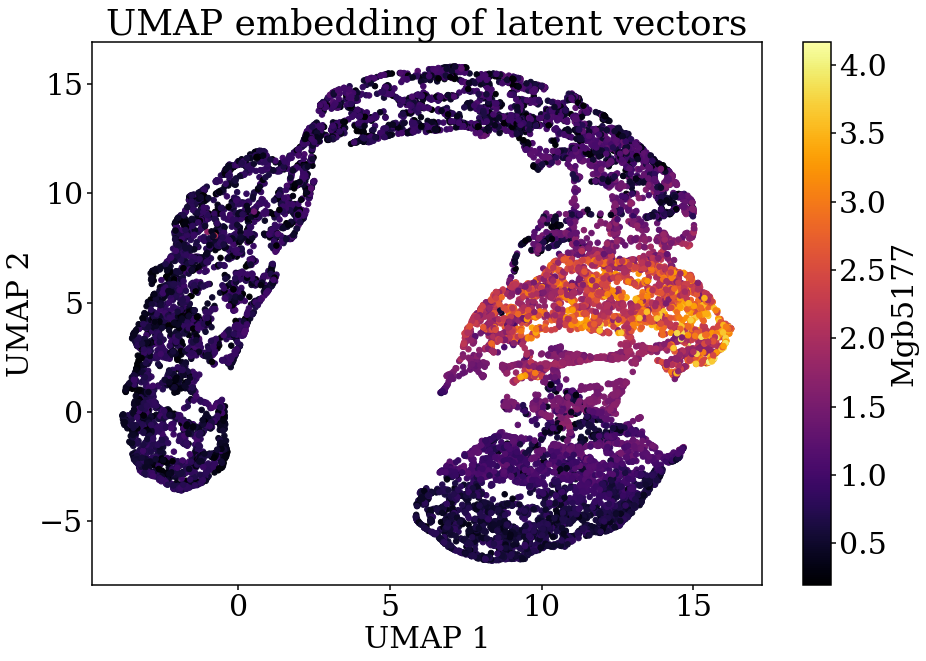

 20%|████████████████████████████▏                                                                                                                | 1/5 [01:23<05:34, 83.67s/it]

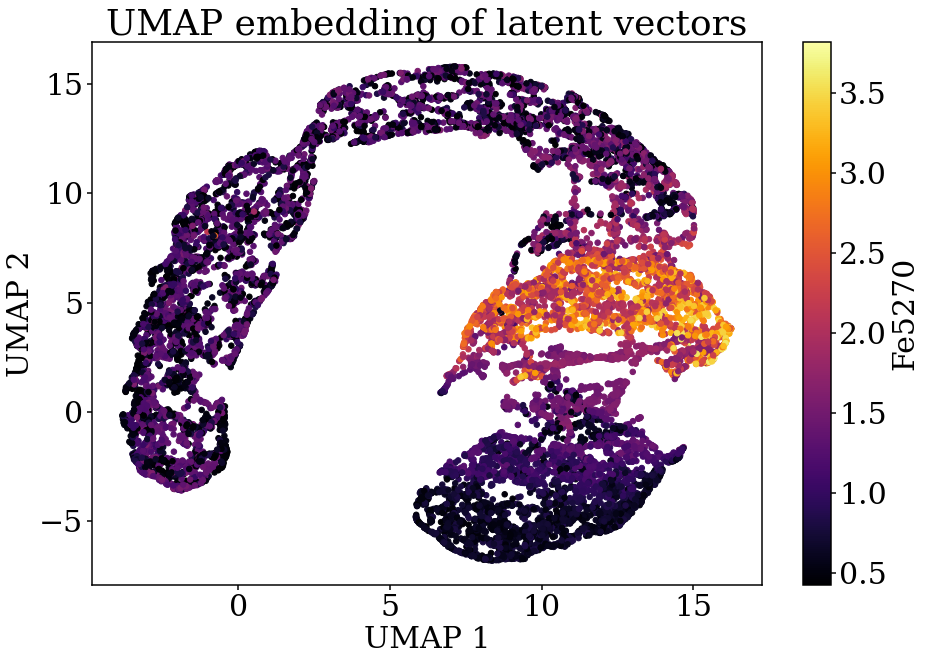

 40%|████████████████████████████████████████████████████████▍                                                                                    | 2/5 [02:48<04:13, 84.40s/it]

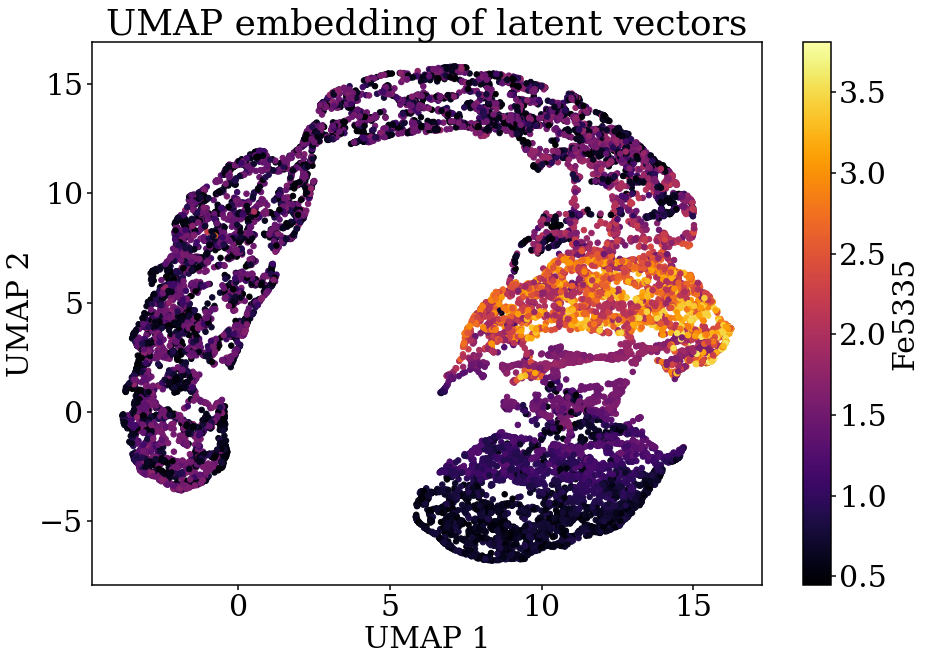

 60%|████████████████████████████████████████████████████████████████████████████████████▌                                                        | 3/5 [04:12<02:48, 84.23s/it]

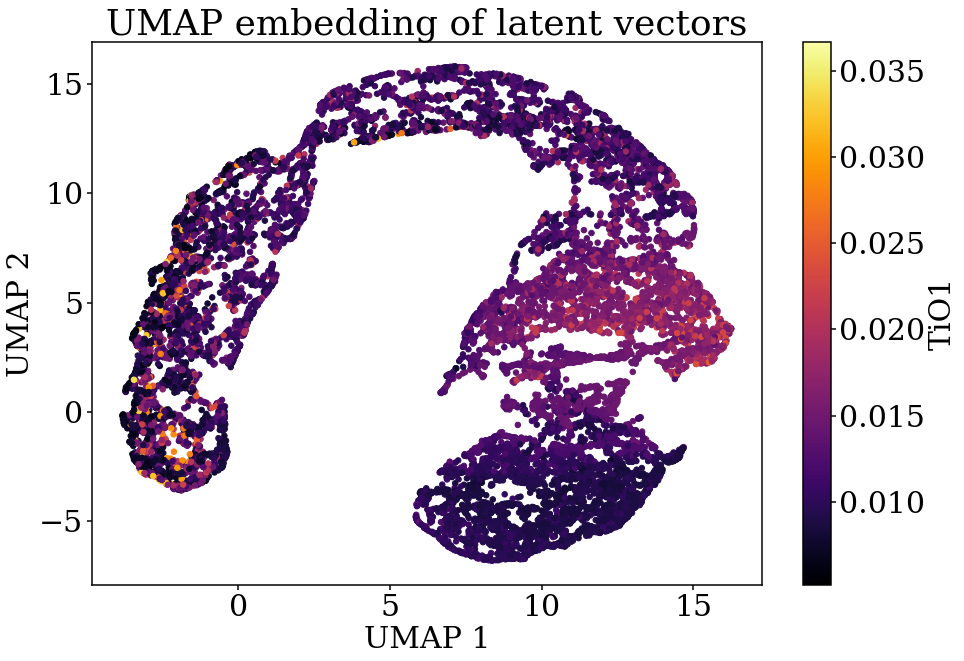

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 4/5 [05:34<01:23, 83.37s/it]

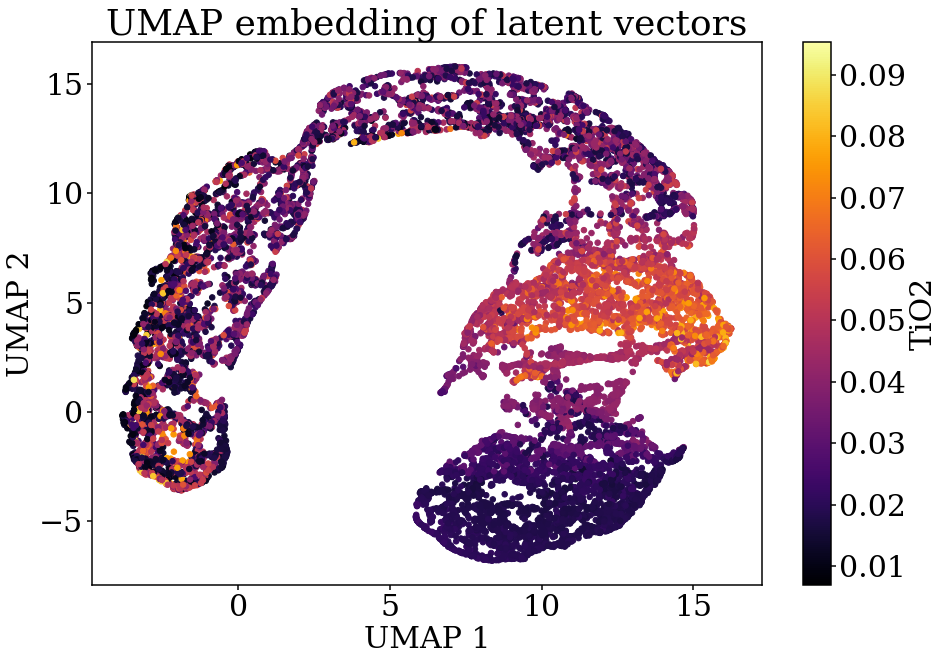

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [06:53<00:00, 82.79s/it]


In [7]:

from tqdm import tqdm 

data= ascii.read("line_index.txt")
for index in tqdm(list(data['NAME'])):
    indexes=[]
    for i in range(len(x_test[:,0])):
        indexes.append(line_index(wave,x_test[i,:],index,data))
    plt.scatter(embed[:,0], embed[:,1], s=30, c=indexes, rasterized=True, cmap='inferno')
    plt.colorbar(label=index)
    plt.title('UMAP embedding of latent vectors')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.savefig('./plots_latent_diagnosis/UMAP_'+str(index)+'.jpg')
    plt.show()

 Blue_1   Blue_2   Line_1   Line_2   Red_1    Red_2    T    NAME 
-------- -------- -------- -------- -------- -------- --- -------
4821.175 4838.404 4848.275 4877.097 4897.445 4915.845   2 Hbeta_o
  4946.5  4977.75  4977.75   5054.0   5054.0  5065.25   2  Fe5015
4895.125 4957.625 5154.125 5196.625 5301.125 5366.125   2     Mg2
  4760.8   4798.8   4738.9   4757.3   4819.8   4835.5   2    bTiO
5142.625 5161.375 5160.125 5192.625 5191.375 5206.375   2 Mgb5177
 5233.15  5248.15  5245.65  5285.65  5285.65  5318.15   2  Fe5270
5304.625 5315.875 5312.125 5352.125 5353.375 5363.375   2  Fe5335
  5723.0   5750.0   5945.0 5994.125 6038.625 6103.625   1    TiO1
  6066.6   6141.6 6189.625   6265.0   6422.0   6455.0   1    TiO2
  5420.0   5442.0   5445.0   5600.0   5630.0   5655.0   1    aTiO


  0%|                                                                                                                                                    | 0/10 [00:00<?, ?it/s]

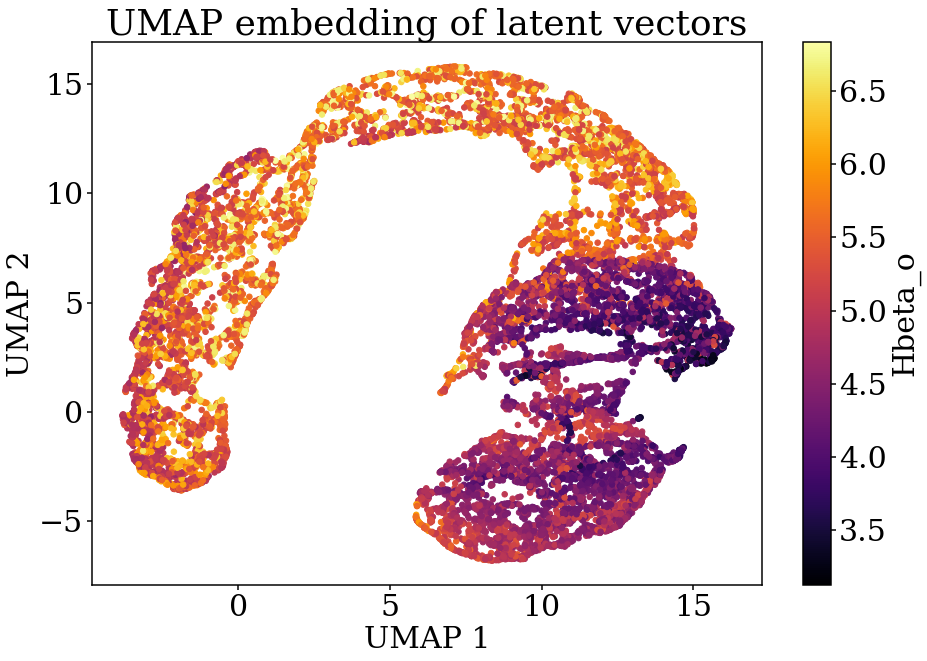

 10%|██████████████                                                                                                                              | 1/10 [01:24<12:36, 84.04s/it]

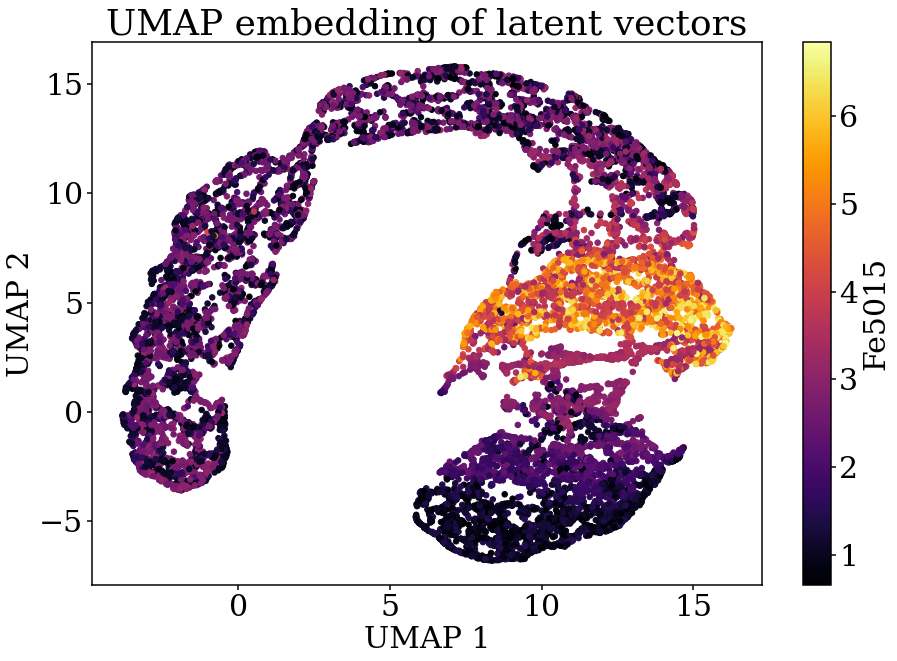

 20%|████████████████████████████                                                                                                                | 2/10 [02:49<11:21, 85.14s/it]

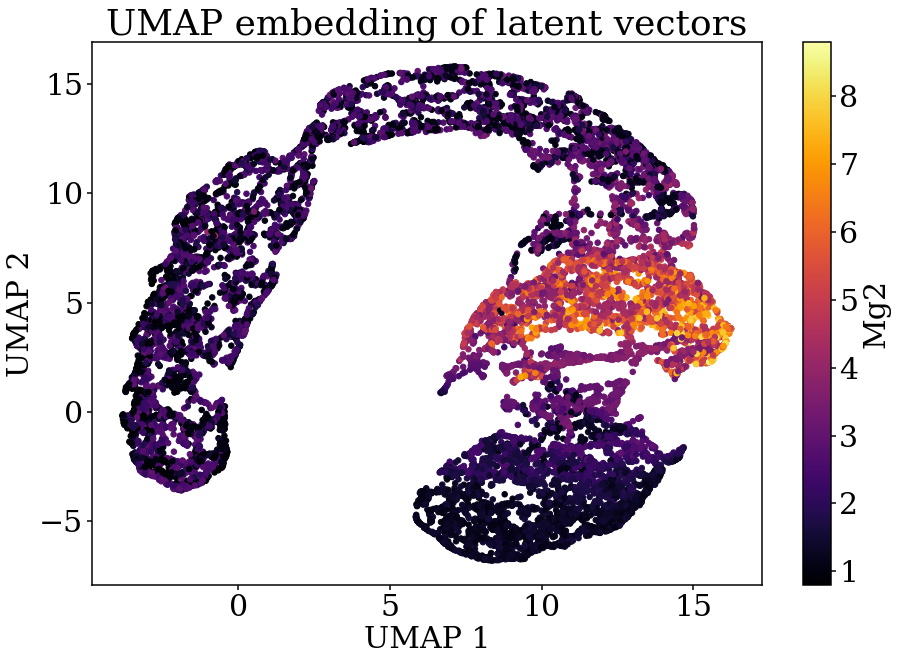

 30%|██████████████████████████████████████████                                                                                                  | 3/10 [04:15<09:57, 85.37s/it]

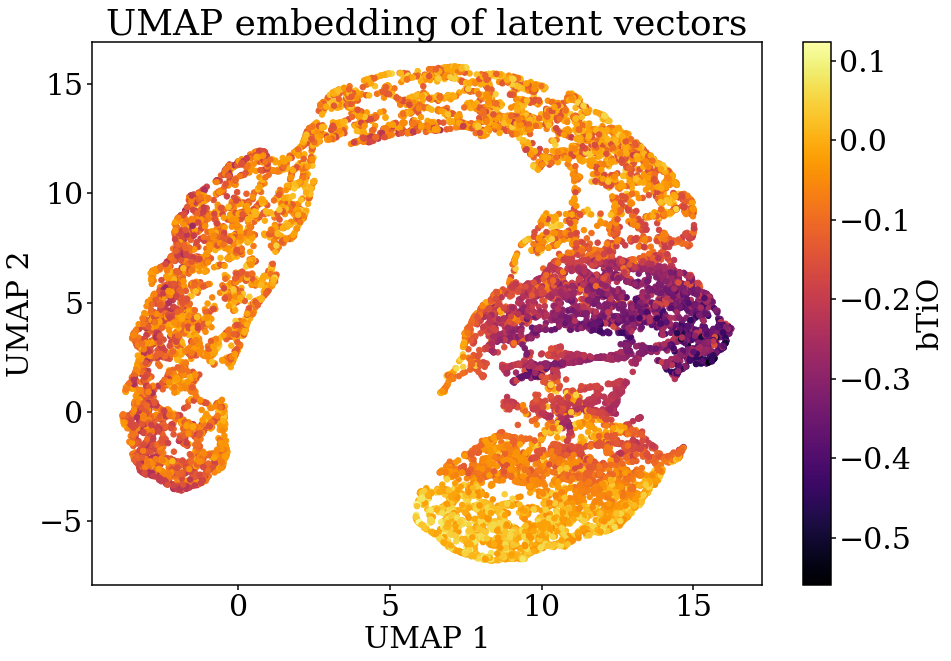

 40%|████████████████████████████████████████████████████████                                                                                    | 4/10 [05:40<08:31, 85.18s/it]

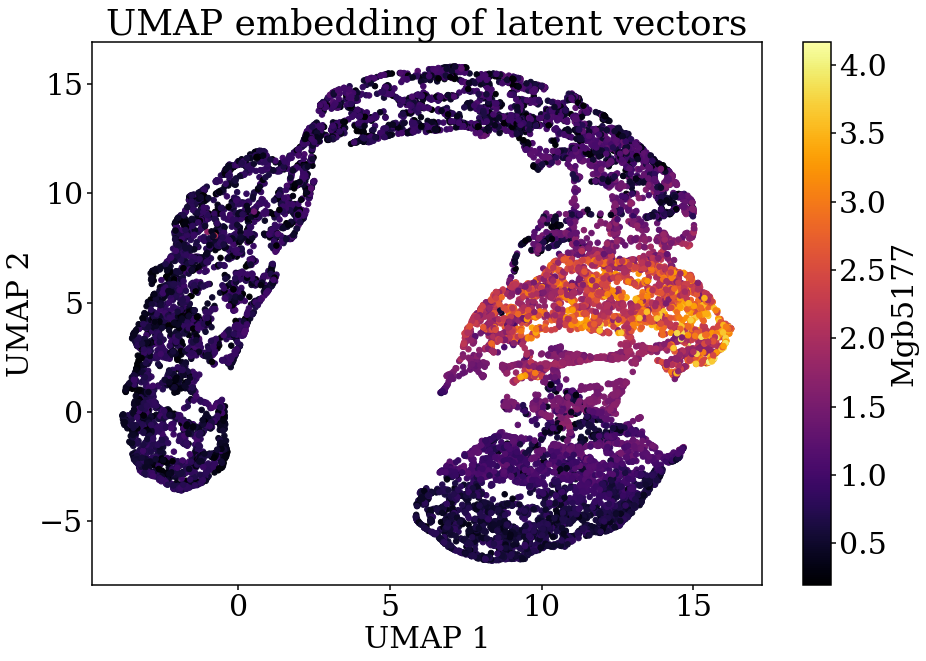

 50%|██████████████████████████████████████████████████████████████████████                                                                      | 5/10 [07:05<07:05, 85.12s/it]

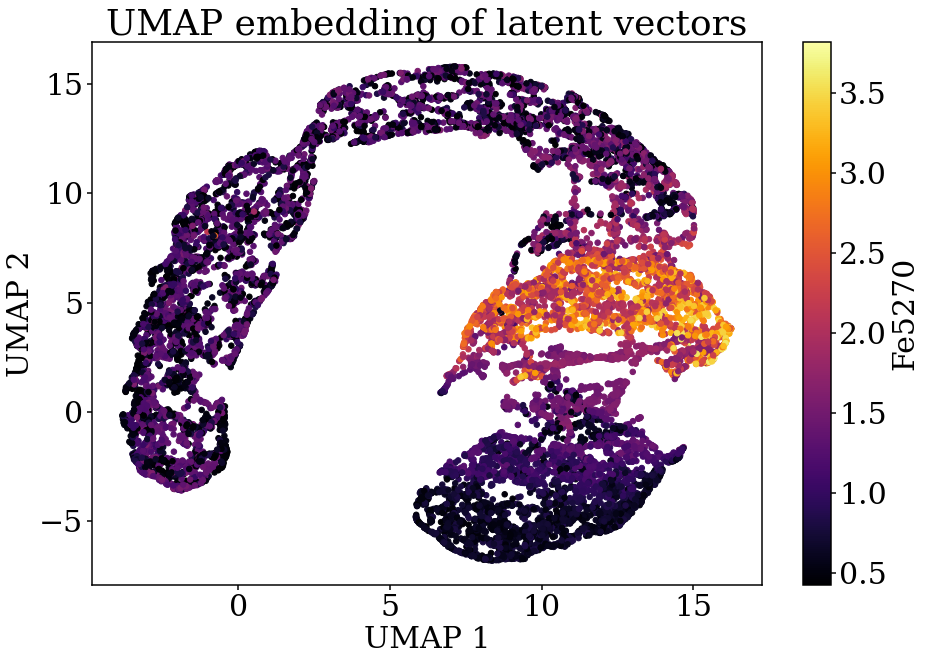

 60%|████████████████████████████████████████████████████████████████████████████████████                                                        | 6/10 [08:31<05:41, 85.41s/it]

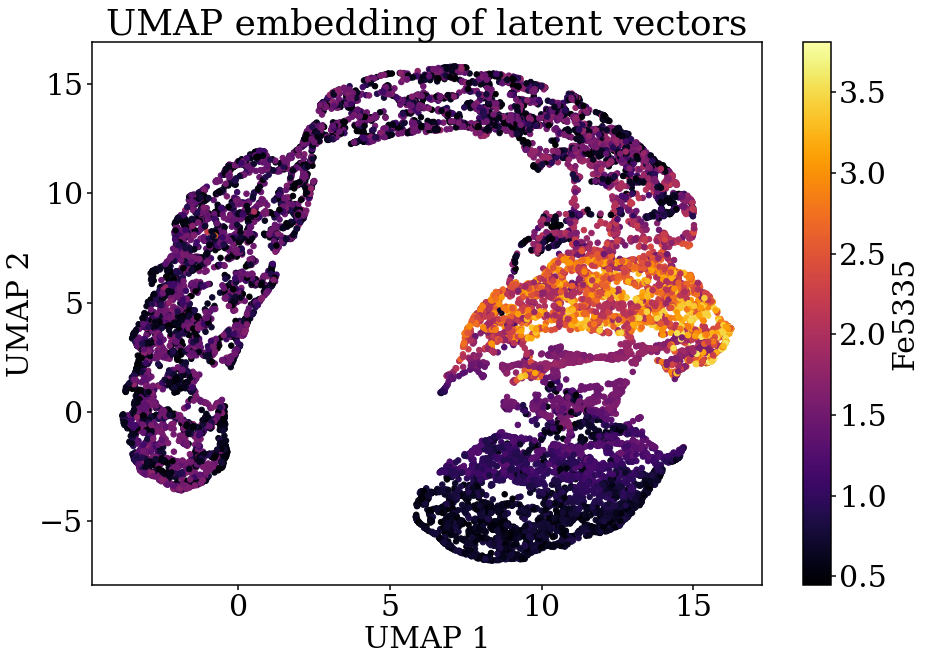

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████                                          | 7/10 [09:56<04:15, 85.31s/it]

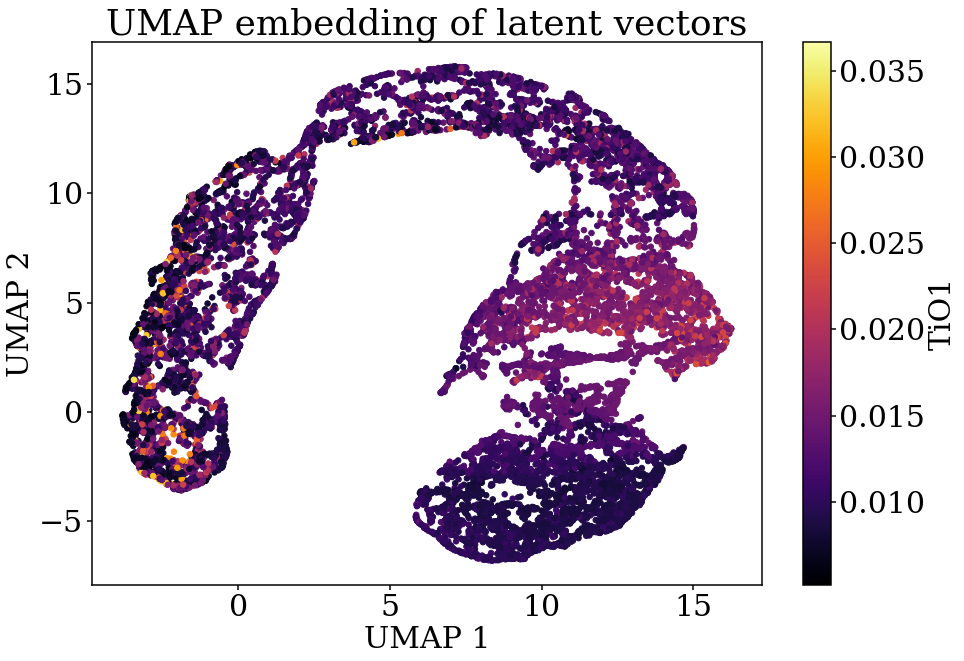

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 8/10 [11:15<02:46, 83.22s/it]

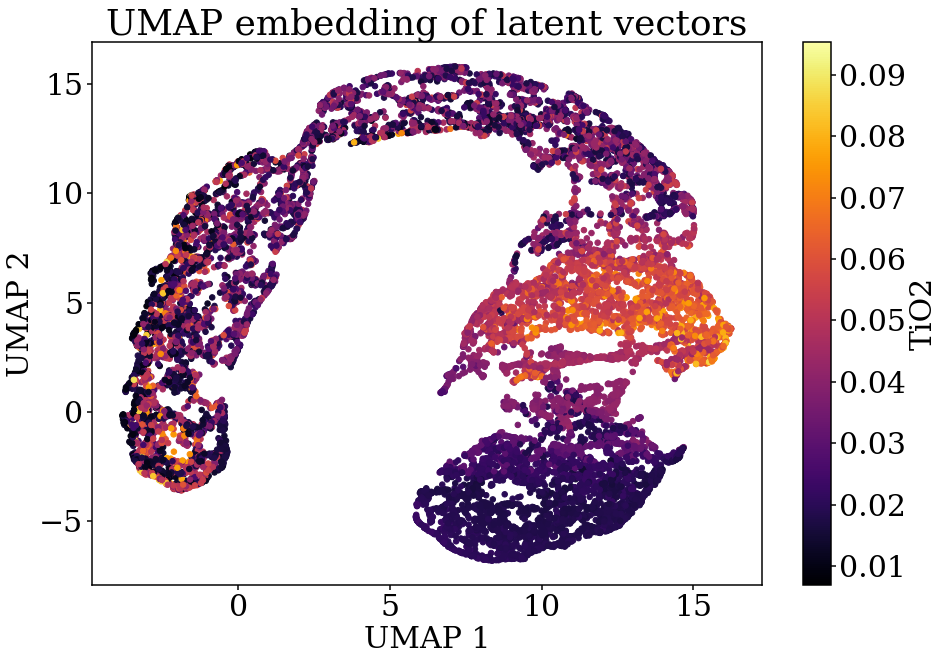

 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 9/10 [12:33<01:21, 81.74s/it]

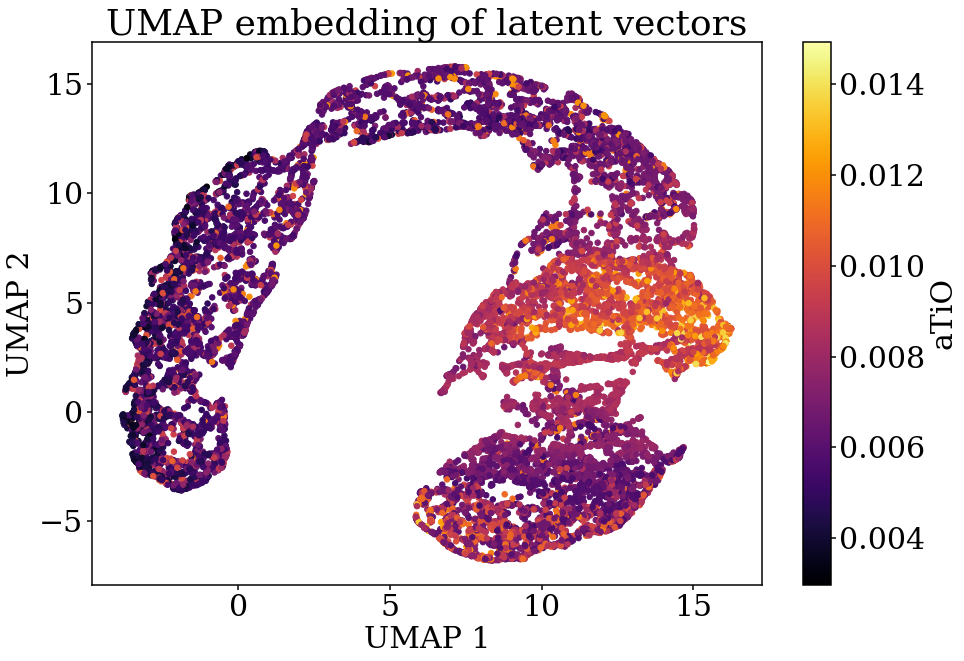

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [13:52<00:00, 83.28s/it]


In [8]:

from tqdm import tqdm 

data= ascii.read("line_index.txt")
print(data)
for index in tqdm(list(data['NAME'])):
    indexes=[]
    for i in range(len(x_test[:,0])):
        indexes.append(line_index(wave,x_test[i,:],index,data))
    plt.scatter(embed[:,0], embed[:,1], s=30, c=indexes, rasterized=True, cmap='inferno')
    plt.colorbar(label=index)
    plt.title('UMAP embedding of latent vectors')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.savefig('./plots_latent_diagnosis/UMAP_'+str(index)+'.jpg')
    plt.show()